In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LogisticRegression import LogisticRegression, LogisticRegressionSklearn
from MultilayerPerceptron import MultilayerPerceptron
from plot_confusion_matrix import plot_confusion_matrix
from DecisionTree import DecisionTree
from preprocessing import *
metrics = DecisionTree()
import warnings
warnings.filterwarnings('ignore')
np.random.seed(41)

# Data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


For the reasons explained in the preprocessing phase, we applied the necessary optimizations to the data.

In [3]:
# Preprocessing
df = replace_zeros_with_median_considering_outcome(df, columns_to_fill=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Train Test Split

We split 80 percent to 20 percent of the data into train and test.

In [4]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

# Custom Logistic Regression Model

We have designed a very simple and straightforward Custom Logistic Regression model.

The optimal parameters for Logistic Regression were set as Learning rate: 0.0001 and iteration 1000.

In [5]:
# Custom Logistic Regression Model
LR_Model = LogisticRegression(learning_rate=0.0001, num_iterations=1000)
LR_Model.fit(X_train, y_train)
# Make predictions
y_pred_lr = LR_Model.predict(X_test)

logistic_regression_confusuion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion matrix: \n{logistic_regression_confusuion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(logistic_regression_confusuion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[22 33]
 [15 84]]
Accuracy: 0.6883116883116883
Precision: 0.5945945945945946
Recall: 0.4
F1: 0.4782608695652174


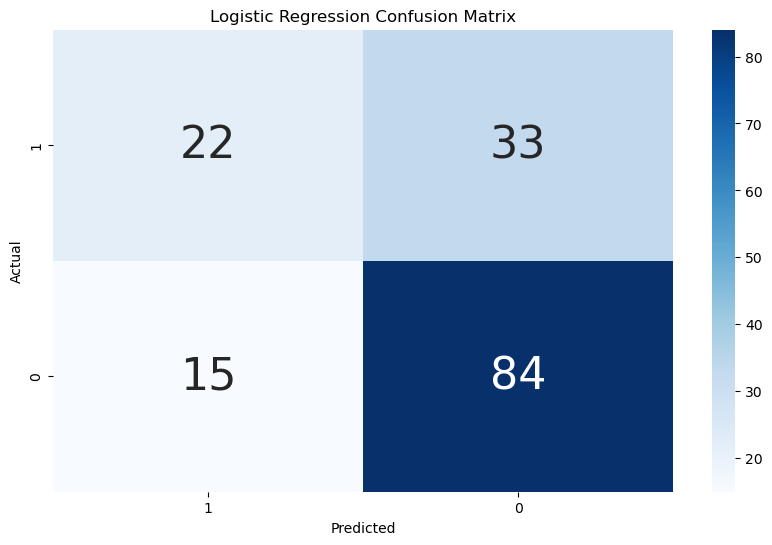

In [6]:
plot_confusion_matrix(logistic_regression_confusuion_matrix, title='Logistic Regression Confusion Matrix')

However, the results do not seem to be enough. Not enough in every sense (accuracy - precision - recall).

On top of that, we decided to try the Logistic Regression model of the Sklearn library, which is much more optimized

# Sklearn Logistic Regression Model

In [7]:
# Sklearn Logistic Regression Model
LR_Sklearn_Model = LogisticRegressionSklearn()
LR_Sklearn_Model.fit(X_train, y_train)
# Make predictions
y_pred_lr = LR_Sklearn_Model.predict(X_test)

logistic_regression_sklearn_confusuion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion matrix: \n{logistic_regression_sklearn_confusuion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(logistic_regression_sklearn_confusuion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[34 21]
 [13 86]]
Accuracy: 0.7792207792207793
Precision: 0.723404255319149
Recall: 0.6181818181818182
F1: 0.6666666666666667


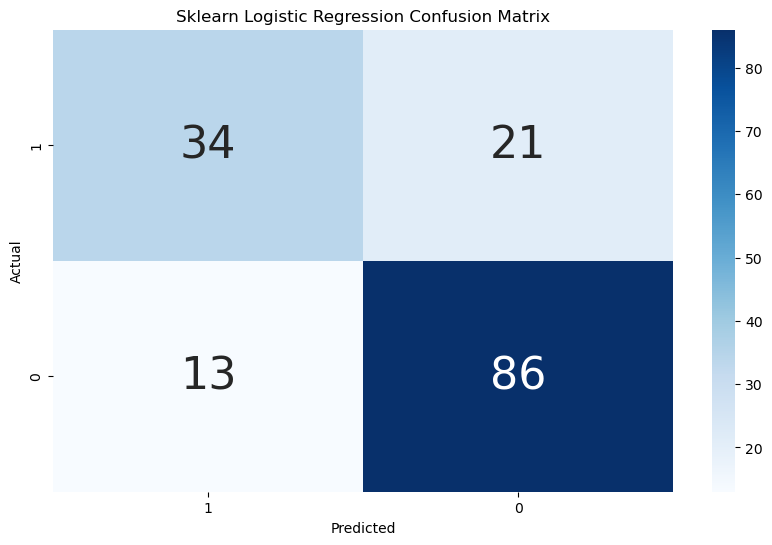

In [8]:
plot_confusion_matrix(logistic_regression_sklearn_confusuion_matrix, title='Sklearn Logistic Regression Confusion Matrix')

It worked relatively better than the custom Logistic Regression model we wrote, but it is still not enough.

# Multilayer Perceptron Model

We decided to use Multilayer Perceptron, which is a more complex and deeper structure. If we explain the structure of Multilayer Perceptron, which we use simply, it is as follows: 
Linear layer - 
Activation layer - 
Linear layer - 
Softmax

In [9]:
# Convert to tensors
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

When using the Multilayer Perceptron algorithm, there are many parameters that affect the result we get. The most important ones are Optimizer and Activarion function.

For the Optimizer we tried Adam and SGD; for the Activation we tried Relu, Tanh and Sigmoid and recorded which combination gave the best result

### Try Every Combination of Features

In [10]:
# Try different activation functions and optimizers combinations for MLP

best_accuracy = 0.0
best_model_info = {}

activation_functions = ['relu', 'sigmoid', 'tanh']
optimizers = ['adam', 'sgd']

for activation in activation_functions:
    for optimizer in optimizers:
        print(f"Start - Activation = {activation}, Optimizer = {optimizer}")

        mlp = MultilayerPerceptron(input_size=X_train_tensor.shape[1],
                                   hidden_size=X_train_tensor.shape[1]*2,
                                   output_size=2,
                                   learning_rate=0.03,
                                   activation=activation,
                                   optimizer=optimizer,
                                   verbose=False)

        mlp.fit(X_train_tensor, y_train_tensor, epochs=1000)

        y_pred_mlp = mlp.predict(X_test_tensor)
        y_pred_mlp = torch.argmax(y_pred_mlp, dim=1)

        mlp_confusion_matrix = metrics.confusion_matrix(
            y_test_tensor, y_pred_mlp)
        accuracy, precision, recall, f1 = metrics.metrics(mlp_confusion_matrix)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_info = {
                "activation": activation, "optimizer": optimizer}

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1: {f1}")
        print("-------------------------------------")

print("\n")
print(
    f"Best: Activation={best_model_info['activation']}, Optimizer={best_model_info['optimizer']}")


Start - Activation = relu, Optimizer = adam
Accuracy: 0.8961038961038961
Precision: 0.8679245283018868
Recall: 0.8363636363636363
F1: 0.8518518518518519
-------------------------------------
Start - Activation = relu, Optimizer = sgd
Accuracy: 0.7727272727272727
Precision: 0.6388888888888888
Recall: 0.8363636363636363
F1: 0.7244094488188975
-------------------------------------
Start - Activation = sigmoid, Optimizer = adam
Accuracy: 0.6428571428571429
Precision: nan
Recall: 0.0
F1: nan
-------------------------------------
Start - Activation = sigmoid, Optimizer = sgd
Accuracy: 0.8051948051948052
Precision: 0.676056338028169
Recall: 0.8727272727272727
F1: 0.7619047619047619
-------------------------------------
Start - Activation = tanh, Optimizer = adam
Accuracy: 0.6428571428571429
Precision: nan
Recall: 0.0
F1: nan
-------------------------------------
Start - Activation = tanh, Optimizer = sgd
Accuracy: 0.7857142857142857
Precision: 0.6617647058823529
Recall: 0.8181818181818182
F1:

Based on the results, the best combination is Activation: Relu, Optimizer: Adam.

Epoch 0, Training Loss: 4.684680938720703 - Training Accuracy: 0.40716612339019775
Epoch 100, Training Loss: 0.4502868056297302 - Training Accuracy: 0.8078175783157349
Epoch 200, Training Loss: 0.39804401993751526 - Training Accuracy: 0.8257328867912292
Epoch 300, Training Loss: 0.35483139753341675 - Training Accuracy: 0.846905529499054
Epoch 400, Training Loss: 0.3376060724258423 - Training Accuracy: 0.8501628637313843
Epoch 500, Training Loss: 0.3228992223739624 - Training Accuracy: 0.8599348664283752
Epoch 600, Training Loss: 0.30714693665504456 - Training Accuracy: 0.8664495348930359
Epoch 700, Training Loss: 0.3014847934246063 - Training Accuracy: 0.8697068691253662
Epoch 800, Training Loss: 0.2947719395160675 - Training Accuracy: 0.871335506439209
Epoch 900, Training Loss: 0.2973228394985199 - Training Accuracy: 0.8762214779853821


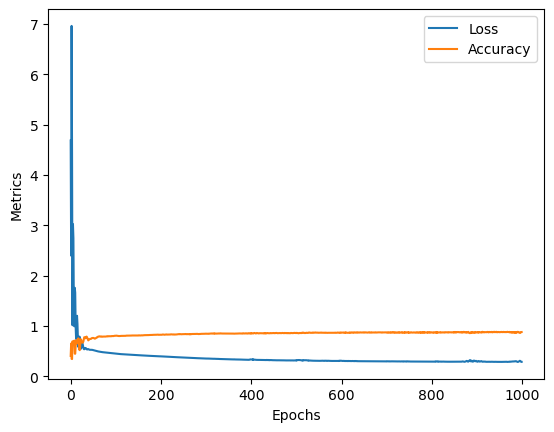

In [50]:
# Multilayer Perceptron
mlp = MultilayerPerceptron(input_size=X_train_tensor.shape[1], 
                           hidden_size=X_train_tensor.shape[1]*2, 
                           output_size=2, 
                           learning_rate=0.03,
                           activation="relu",
                           optimizer="adam",)
mlp.fit(X_train_tensor, y_train_tensor, epochs=1000)

In [51]:
# Make predictions
y_pred_mlp = mlp.predict(X_test_tensor)
y_pred_mlp = torch.argmax(y_pred_mlp, dim=1)

mlp_confusion_matrix = metrics.confusion_matrix(y_test_tensor, y_pred_mlp)
print(f"Confusion matrix: \n{mlp_confusion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(mlp_confusion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[43 12]
 [ 6 93]]
Accuracy: 0.8831168831168831
Precision: 0.8775510204081632
Recall: 0.7818181818181819
F1: 0.8269230769230769


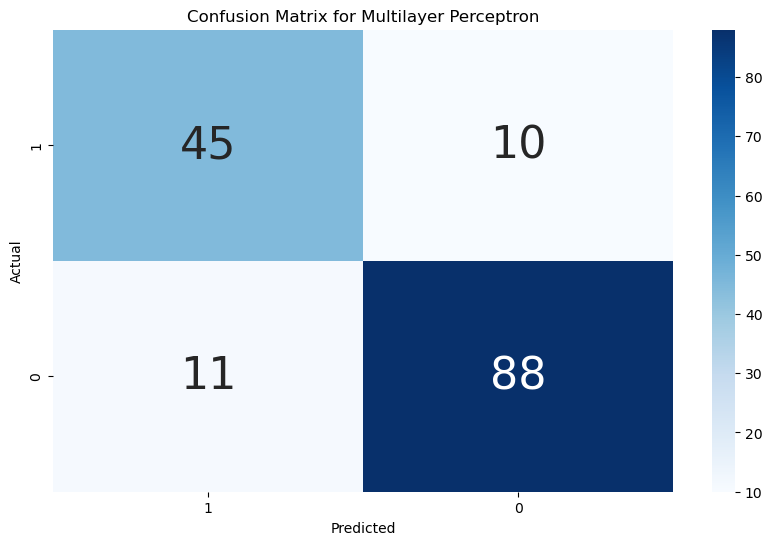

In [13]:
plot_confusion_matrix(mlp_confusion_matrix, "Confusion Matrix for Multilayer Perceptron")

In [53]:
# Save the model
torch.save(mlp.state_dict(), 'MLP_model.pth')